In [1]:
# Web Scraping Fundamentals
# Step 1
## Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Step 2
## Send HTTP request to the server to retrieve HTML of the web page. For this use User-Agent Header, which will mimimc real browser.
response = requests.get("https://example.com")

In [ ]:
# Step 3
## Parse the HTML content to extract information
soup = BeautifulSoup(response.content. 'html.parser')

In [ ]:
# Step 4
## Extract the data required from the content 
# let say we want to extract the headlines
headlines = soup.find_all('h2')
for h in headlines:
    print(h.text.strip())

In [ ]:
# Step 5
## Save it in a proper and structured format for further analysis
# Save it to a dataframe
data = [i.text.strip() for i in headlines]
df = pd.DataFrame(data, columns = ['Headlines'])
df.head()

In [ ]:
# Step 6
## Start the analysis with the data extracted from the website

In [ ]:
## Things to remember while working on web scraping
"""Request Headers: Some websites may block requests that look like they're from bots. You might need to add User-Agent headers to make your request look like it’s from a real browser.

Handling Pagination: If you're scraping multiple pages, you'll need to handle pagination and loop through different URLs. Use proxy servers

Respecting robots.txt: Always check the site's robots.txt file to ensure you're allowed to scrape it."""

In [ ]:
# Scraping Amazon bestseller page in education & teaching industry of top 50 authors and their ratings
## Import packages/libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
## Add the link of the website to scrap, and use User-Agent Header
base_url = "https://www.amazon.in/gp/bestsellers/books/4149461031/ref=zg_bs_pg_{}?ie=UTF8&pg={}"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

In [9]:
## Initialise a list to store the book data
book_list = []

## iterate over the first 3 pages to get top 50 books
for page in range(1,4):
    
    # construct the URL for the current page
    url = base_url.format(page, page)

    # Use get method to get the HTML content
    response = requests.get(url, headers = headers)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'lxml')

    # find all the book elements
    books = soup.find_all("div", {"class": "zg-grid-general-faceout"})

    # Iterate through each book element to extract data
    for book in books:
        if len(book_list) < 51:  # stop once we've collected 50 books
            author = book.find("a", class_="a-size-small a-link-child").get_text(strip=True) if book.find("a", class_="a-size-small a-link-child") else "N/A"
            rating = book.find("span", class_="a-icon-alt").get_text(strip=True) if book.find("span", class_="a-icon-alt") else "N/A"
            
            # append the extracted data to the book_list
            book_list.append({
                "Author": author,
                "Rating": rating
            })
        else:
            break
 
    

In [11]:
## Save the extracted data to a dataframe
df = pd.DataFrame(book_list)
print(df.head(10))

## Save the DataFrame to a CSV file
df.to_csv("amazon_top_50_books_authors_ratings.csv", index=False)

                    Author              Rating
0                      N/A                 N/A
1  EduGorilla Prep Experts  4.2 out of 5 stars
2                 PR Yadav  4.4 out of 5 stars
3                      N/A  4.4 out of 5 stars
4           एम लक्ष्मीकांत  4.4 out of 5 stars
5        Ishinna B. Sadana  4.7 out of 5 stars
6                      N/A  4.7 out of 5 stars
7                      N/A  4.1 out of 5 stars
8          Timothy Ferriss  4.5 out of 5 stars
9  EduGorilla Prep Experts  5.0 out of 5 stars


In [ ]:
# Scraping wikipedia web pages of unicorn_startup_companies(Extracting their name, valuation, industry and founder name)

In [37]:
## Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from time import sleep

In [38]:
## Send HTTP request to the server to retrieve HTML of the web page. Also check the robots.txt file of the website whether user is allowed to scrape or not
response = requests.get("https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies")
if response.status_code == 200:
    print("robots.txt content:")
    print(response.text)
else:
    print(f"Failed to retrieve robots.txt, Status code: {response.status_code}")

robots.txt content:
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of unicorn startup companies - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-li

In [39]:
## Parse the HTML content
soup = BeautifulSoup(response.content,'html.parser')

In [40]:
## Extract the data
def get_unicorn_companies():
    
    # Find the table with unicorn companies
    tables = soup.find_all('table', {'class': 'wikitable'})
    
    # Usually the first table contains the current listings
    if not tables:
        print("Could not find the table of unicorn companies")
        return []
    
    # Extract company information
    companies = []
    
    # Process each table (there might be multiple tables for different regions)
    for table in tables:
        rows = table.find_all('tr')[1:]  # Skip header row
        
        for row in rows:
            cells = row.find_all('td')
            if len(cells) >= 5:  # Ensure there are enough cells
                company_cell = cells[0]
                valuation_cell = cells[1]
                industry_cell = cells[3]
                
                # Extract company name and link
                company_link = company_cell.find('a')
                if company_link:
                    company_name = company_link.get_text().strip()
                    wiki_link = "https://en.wikipedia.org" + company_link.get('href') if company_link.get('href').startswith('/') else company_link.get('href')
                else:
                    company_name = company_cell.get_text().strip()
                    wiki_link = None
                
                # Extract valuation (remove any footnotes)
                valuation_text = re.sub(r'\[\d+\]', '', valuation_cell.get_text().strip())
                
                # Extract industry
                industry = industry_cell.get_text().strip()
                
                companies.append({
                    'name': company_name,
                    'valuation': valuation_text,
                    'industry': industry,
                    'wiki_link': wiki_link
                })
                
                # Limit to top 50 companies
                if len(companies) >= 50:
                    return companies
    
    return companies[:50]  # Ensure we return at most 50

def extract_founder_info(wiki_url):
    """
    Extract founder information from a company's Wikipedia page
    """
    if not wiki_url:
        return "Not available"
    
    try:
        response = requests.get(wiki_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Company details are usually in the infobox table
        infobox = soup.find('table', {'class': 'infobox'})
        
        if infobox:
            rows = infobox.find_all('tr')
            
            for row in rows:
                header = row.find('th')
                if header:
                    header_text = header.get_text().strip().lower()
                    
                    # Find founder(s)
                    if any(term in header_text for term in ['founder', 'founded by', 'key people']):
                        founder_cell = row.find('td')
                        if founder_cell:
                            # Clean up the text (remove citations, etc.)
                            founder_text = re.sub(r'\[\d+\]', '', founder_cell.get_text().strip())
                            founder_text = re.sub(r'\s+', ' ', founder_text)
                            return founder_text
        
        # Look for founder in the article text if not found in infobox
        paragraphs = soup.find_all('p')
        for p in paragraphs[:5]:  # Check first few paragraphs
            text = p.get_text().lower()
            if 'founded' in text or 'founder' in text:
                # Extract sentence containing founder information
                return p.get_text().strip()
        
        return "Not found in Wikipedia page"
    
    except Exception as e:
        print(f"Error extracting details from {wiki_url}: {e}")
        return "Error accessing Wikipedia page"

# Fetch unicorn companies list
companies = get_unicorn_companies()

if not companies:
    print("Failed to retrieve companies list.")
else:
    print(f"Found {len(companies)} companies. Now extracting founder details...")
    
    # Create list to store results
    results = []
    
    for i, company in enumerate(companies):
        print(f"Processing {i+1}/{len(companies)}: {company['name']}")
        
        # Get founder information if Wikipedia link exists
        founder = "N/A"
        if company['wiki_link']:
            founder = extract_founder_info(company['wiki_link'])
            # Be nice to Wikipedia servers
            sleep(1)
        results.append({
            'Company Name': company['name'],
            'Valuation(US$ billions)': company['valuation'],
            'Industry': company['industry'],
            'Founder': founder,
            'Wikipedia URL': company['wiki_link'] or "N/A"
        })
    
    # Create DataFrame and export
    df = pd.DataFrame(results)
    df.to_csv('top_unicorn_companies.csv', index=False)
    print("Data saved to top_unicorn_companies.csv")
    

Found 50 companies. Now extracting founder details...
Processing 1/50: SpaceX
Processing 2/50: ByteDance
Processing 3/50: OpenAI
Processing 4/50: xAI
Processing 5/50: Stripe
Processing 6/50: Binance
Processing 7/50: Shein
Processing 8/50: Databricks
Processing 9/50: Anthropic
Processing 10/50: Safe Superintelligence
Processing 11/50: Epic Games
Processing 12/50: Telegram
Processing 13/50: Canva
Processing 14/50: Anduril Industries
Processing 15/50: Fanatics
Processing 16/50: Chime
Processing 17/50: Perplexity AI
Processing 18/50: Revolut
Processing 19/50: Miro
Processing 20/50: Nature's Fynd
Processing 21/50: Trendyol
Processing 22/50: Yuanfudao
Processing 23/50: Discord
Processing 24/50: DJI
Processing 25/50: GoPuff
Processing 26/50: Scale AI
Processing 27/50: Xiaohongshu
Processing 28/50: Plaid
Processing 29/50: Grammarly
Processing 30/50: Devoted Health
Processing 31/50: Faire
Processing 32/50: Brex
Processing 33/50: Biosplice Therapeutics
Processing 34/50: Bitmain
Processing 35/50:

In [41]:
df.head()

,Company Name,Valuation(US$ billions),Industry,Founder,Wikipedia URL
0,SpaceX,350,Aerospace,Elon Musk,https://en.wikipedia.org/wiki/SpaceX
1,ByteDance,315,Internet,Zhang YimingLiang Rubo,https://en.wikipedia.org/wiki/ByteDance
2,OpenAI,300,Artificial intelligence,John SchulmanElon MuskIlya SutskeverSam Altman,https://en.wikipedia.org/wiki/OpenAI
3,xAI,113,Artificial Intelligence,Elon Musk,https://en.wikipedia.org/wiki/XAI_(company)
4,Stripe,91.5,Financial services,Patrick and John Collison,https://en.wikipedia.org/wiki/Stripe_(company)


In [42]:
# Analyse the dataset

# Group by 'Industry' and count no of companies in each industry
industry_companies = df.groupby('Industry')['Company Name'].count()
print(industry_companies)

Industry
Aerospace                  1
Artificial Intelligence    4
Artificial intelligence    3
Batteries                  1
Biotechnology              1
Blockchain                 1
Collaborative software     2
Consumer packaged goods    1
Cryptocurrency             2
Defense technology         1
E-commerce                 6
Educational technology     1
Finance                    1
Financial services         2
Financial technology       5
Graphic design             1
Health                     1
Healthcare                 1
Internet                   2
Marketplace                1
Retail                     1
Self-driving cars          2
Software                   5
Technology                 1
Venture capital            1
Video games                1
Workforce management       1
Name: Company Name, dtype: int64


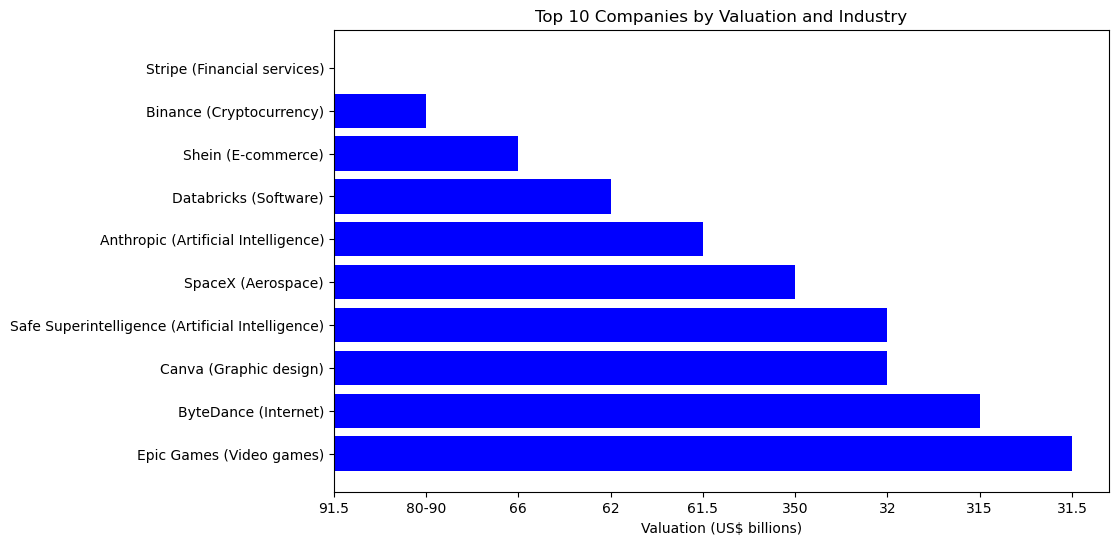

In [44]:
# Top 10 companies by Valuation
import matplotlib.pyplot as plt
# Step 1: Sort the DataFrame by 'Valuation(US$ billions)' in ascending order and take the top 10
top_10_companies = df.sort_values(by='Valuation(US$ billions)', ascending=False).head(10)

# Step 2: Combine the 'Industry' and 'Company Name' columns for labeling
top_10_companies['Industry_Company'] = top_10_companies['Company Name'] + ' (' + top_10_companies['Industry'] + ')'

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_companies['Industry_Company'], top_10_companies['Valuation(US$ billions)'], color='blue')
plt.xlabel('Valuation (US$ billions)')
plt.title('Top 10 Companies by Valuation and Industry')
plt.gca().invert_yaxis()  # Invert y-axis so the highest valuation is on top
plt.show()

In [49]:
# Identify companies with more than one founder
# Step 1: Clean the 'Founder' column to extract only names
def extract_founders(founder_text):
    # Regular expression to extract capitalized names
    founders = re.findall(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)*\b', founder_text)
    return ', '.join(founders)  # Join multiple founders by a comma

# Apply the function to clean the 'Founder' column
df['Founder'] = df['Founder'].apply(extract_founders)

# Step 2: Identify companies with more than one founder by counting the number of names
df['Founder Count'] = df['Founder'].apply(lambda x: len(x.split(',')))

# Step 3: Filter companies with more than one founder
companies_with_multiple_founders = df[df['Founder Count'] > 1]

# Step 4: Keep only 'Company Name' and 'Founder' columns
companies_with_multiple_founders = companies_with_multiple_founders[['Company Name', 'Founder']]

# Step 5: Display the result
print(companies_with_multiple_founders)

              Company Name                                            Founder
1                ByteDance                                        Zhang, Rubo
2                   OpenAI                                       John, Altman
4                   Stripe                             Patrick, John Collison
5                  Binance                                      Changpeng, He
7               Databricks                                      Ali, Tavakoli
8                Anthropic                                        Dario, Mann
9   Safe Superintelligence                                         Ilya, Levy
11                Telegram  Telegram, Nikolai, Pavel Durov, Its, Dubai, Un...
12                   Canva                                     Melanie, Adams
13      Anduril Industries                                    Palmer, Schimpf
14                Fanatics                       Michael Rubin, Fanatics, Inc
15                   Chime                             Chris Bri